In [1]:
# Imports 
import pandas as pd
import numpy as np
from numpy.random import shuffle
import math  
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score,  confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
import tensorflow as tf

Using TensorFlow backend.


In [31]:
df_promoter = pd.read_csv("file name",names = ['Y', 'X'])

In [32]:
df_promoter_shuffle = pd.read_csv("file name",names = ['Y', 'X'])

In [33]:
df_promoter_shuffle.drop(df_promoter_shuffle.index[0])
df_promoter_shuffle.reset_index(inplace = True)
df_promoter_shuffle.drop(['index'], axis = 1, inplace= True)

In [34]:
df_promoter_shuffle['Y'] = 'Shuffled Promoters'


In [35]:
df_promoter_shuffle.head()

,Y,X
0,Shuffled Promoters,ACCCGTTCGTAAAATTGGCGTTTGTCTCTAGTTTGCGATAGTGTAG...
1,Shuffled Promoters,ACATATCAAACTACAATAATACTGCCCTGCTAAATTAGCGGTACCC...
2,Shuffled Promoters,GAGTAGAGCAACCAACTCACAATGCATAACTAAGATACAAACTTTA...
3,Shuffled Promoters,AACACTTATTTTATTGTGGTAATATTTTTTGATAACAACACATCTG...
4,Shuffled Promoters,AATTACTTCATCATTACCACCTGTTACCAGTACAACAACAAGTCAG...


In [36]:
def shuffler(sequence, k_let):
    
    length = [sequence[i:i+k_let] for i in range(0,len(sequence),k_let)]
    np.random.shuffle(length)
    
    return ''.join(length)

k_let = 1
df_terminator = df_promoter_shuffle['X'].apply(shuffler,args = [k_let])
df_terminator = pd.concat([df_promoter_shuffle['Y'], df_terminator],axis=1)
df_terminator.head()

,Y,X
0,Shuffled Promoters,TTGTAGTAGCAGGCGTCAAGATGTAAAATGGCCATGTACTTAATGA...
1,Shuffled Promoters,GCCCTAACCTGAGTACGCCGGTTCACCAAACCGCAACTTGAACTGA...
2,Shuffled Promoters,CAGCGATAGGTTAATGAGATAGTACAATCTAACGTAAACACTCCTT...
3,Shuffled Promoters,TAACAACAATGCCAGTCATGTAGGTGTAGACCATGGCTTCAGGGTG...
4,Shuffled Promoters,TAAGTTCTGCGGCAGGTGGTATTTAGTGCACCGGGTCTGCTTAAGT...


In [37]:
df_terminator.shape

(6125, 2)

In [38]:
df = pd.concat([df_promoter,df_terminator],axis=0)
df = df[df['X'].str.len() == 1000]
df.shape

(12244, 2)

In [39]:
print(df['X'].str.len().value_counts())  # All the sequences have equal length
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace= True)

1000    12244
Name: X, dtype: int64


In [40]:
#df.tail()
df.head()

,Y,X
0,Fungus_Promoter,ACCCGTTCGTAAAATTGGCGTTTGTCTCTAGTTTGCGATAGTGTAG...
1,Fungus_Promoter,ACATATCAAACTACAATAATACTGCCCTGCTAAATTAGCGGTACCC...
2,Fungus_Promoter,GAGTAGAGCAACCAACTCACAATGCATAACTAAGATACAAACTTTA...
3,Fungus_Promoter,AACACTTATTTTATTGTGGTAATATTTTTTGATAACAACACATCTG...
4,Fungus_Promoter,AATTACTTCATCATTACCACCTGTTACCAGTACAACAACAAGTCAG...


In [41]:
df.tail()

,Y,X
12239,Shuffled Promoters,ATTAAATAGAGGATGCCTAAAATAATTTAGATGCTAGCGCCGAAGT...
12240,Shuffled Promoters,CTTTACAATGGAACTATATTGTATCAACAAGGAACGAGGCTATGGG...
12241,Shuffled Promoters,CACTACAAGCAGACTTACTTAATGTGACTAATCGCTGGGAAGGTGT...
12242,Shuffled Promoters,ATTAAAGAACGTCGGAATCGCATTAAATATGGTCTTGCTTCTATAA...
12243,Shuffled Promoters,AGGGCATGGTGCAAGCCTCAGGAATGAATCATATTTCATTCTTAAT...


,Y,X
count,12244,12244
unique,2,12164
top,Shuffled Promoters,AATAAAGAATGTAAATAATATATATATAATATAATATAATATAAAA...
freq,6122,6


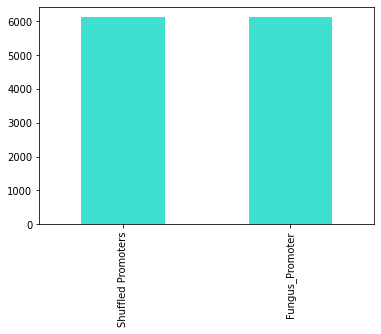

In [42]:
df['Y'].value_counts().plot('bar',color = 'turquoise')
df.describe()

### To remove duplicate samples from df['X']

In [43]:
labels = df['Y']
X = df['X']
X_drop_dup = X.drop_duplicates()
idx = X_drop_dup.index
data = np.array(df)
df_final = pd.DataFrame(data[idx])

df_final.columns = ['Y','X']
#df_final.tail() # New dataframe with recurring samples eliminated
#df_final.head()

### Plot of class samples count for df_final

In [ ]:
df_final['Y'].value_counts().plot('bar',color = 'orange')

In [45]:
#Choosing Training sample count:
limit = 6000
df_final_promoter= df_final[df_final['Y'] == 'Fungus_Promoter'][:limit]
df_final_terminator=df_final[df_final['Y'] == 'Shuffled Promoters'][:limit]

In [ ]:
df_final = pd.concat([df_final_promoter,df_final_terminator],ignore_index=True)
df_final.tail() # New dataframe with recurring samples eliminated
df_final.head()

In [47]:
df_final.reset_index(inplace = True)
df_final.drop(['index'], axis = 1, inplace= True)

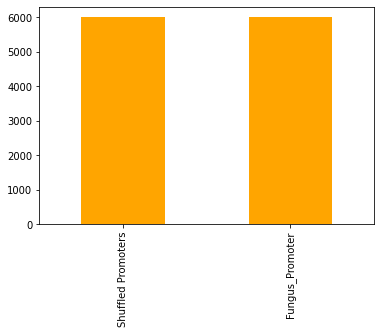

In [48]:
df_final['Y'].value_counts().plot('bar',color = 'orange')

In [49]:
def getKmers(X, size=4):
    return [X[x:x+size].lower() for x in range(len(X) - size + 1)]

df_final['words']=df_final.apply(lambda x: getKmers(x['X']), axis=1)
df_final.drop('X',axis=1, inplace= True)



In [ ]:
model.summary()

In [51]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import sequence
Y = df_final.Y
le = LabelEncoder()
Y = le.fit_transform(Y)
df_texts = list(df_final['words'])
for item in range(len(df_texts)):
    df_texts[item] = ' '.join(df_texts[item])
X=df_texts
max_len = 997
tok = Tokenizer(num_words=None)
tok.fit_on_texts(X)
vocab_size = len(tok.word_index) + 1
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=None)

In [52]:
print(sequences_matrix.shape)

(12000, 997)


In [53]:
le.inverse_transform([0,1])


array(['Fungus_Promoter', 'Shuffled Promoters'], dtype=object)

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(sequences_matrix,Y,test_size=0.10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.10) 

In [55]:
print(X_train.shape[0])
print(X_train.shape[1])

10800
997


In [ ]:
from keras.layers import Embedding
model = Sequential()
model.add(Embedding(vocab_size,128,input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5,padding='same'))
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(filters=64, kernel_size=5, padding='same'))
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(filters=32, kernel_size=5, padding='same'))
model.add(MaxPooling1D(pool_size=4))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [56]:
from keras.layers import Embedding
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional, Flatten
from keras.models import Model
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(vocab_size,50,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(64,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

model = RNN()

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#model.compile(loss = "categorical_crossentropy", optimizer = opt)

In [30]:
import time
start_time=time.time()
print("Training Time Starts")

Training Time Starts


In [ ]:
model.fit(X_train,Y_train,batch_size=128,epochs=10,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


In [ ]:
xx=(time.time()) - (start_time)


In [ ]:
xx

In [ ]:
y_pred1 = model.predict(X_val)
confuse = confusion_matrix(Y_val, y_pred1.round())

print(confuse)

TP=confuse[1][1]
FP=confuse[0][1]
FN=confuse[1][0]
TN=confuse[0][0]

accuracy= (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F=2*(precision * recall)/(precision + recall)
specificity= TN / (TN + FP) 
Error_Rate= (FP + FN)/(TP + FP + TN + FN)
CC=((TP*TN)-(FP*FN))/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

print("accuracy {:0.2f}".format(accuracy))
print("Precision {:0.2f}".format(precision))
print("Recall/Sensitivity {:0.2f}".format(recall))
print("F1 Score {:0.2f}".format(F))
print("Specificity {:0.2f}".format(specificity))
print("Error_Rate {:0.2f}".format(Error_Rate))
print("correlation Coefficient {:0.2f}".format(CC))

In [ ]:
y_pred1 = model.predict(X_test)
confuse = confusion_matrix(Y_test, y_pred1.round())

print(confuse)

TP=confuse[1][1]
FP=confuse[0][1]
FN=confuse[1][0]
TN=confuse[0][0]

accuracy= (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F=2*(precision * recall)/(precision + recall)
specificity= TN / (TN + FP) 
Error_Rate= (FP + FN)/(TP + FP + TN + FN)
CC=((TP*TN)-(FP*FN))/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

print("accuracy {:0.2f}".format(accuracy))
print("Precision {:0.2f}".format(precision))
print("Recall/Sensitivity {:0.2f}".format(recall))
print("F1 Score {:0.2f}".format(F))
print("Specificity {:0.2f}".format(specificity))
print("Error_Rate {:0.2f}".format(Error_Rate))
print("correlation Coefficient {:0.2f}".format(CC))


In [ ]:
df_random = pd.read_csv("Random Sequences Human_test data.csv",names = ['Y', 'X'])
df_random.drop(df_random.index[0])

In [28]:
df_random.reset_index(inplace = True)
df_random.drop(['index'], axis = 1, inplace= True)

In [29]:
df_random = df_random[df_random['X'].str.len() == 1000]

In [30]:
df_random.reset_index(inplace = True)
df_random.drop(['index'], axis = 1, inplace= True)

In [31]:
df_random.head()

,Y,X
0,Shuffled Promoters,AAAAAAAAAAGTTCTAAAAGTTGTGACTTGGGTGTGGCAGATTGTG...
1,Shuffled Promoters,AAAAAAAATATTTGACCCATCTCGTCTCTACCCTGAATTTCCCTGA...
2,Shuffled Promoters,AAAAATACAAAAAATTAGCCGGGCGTGGTGGCGGGCGCCTGTAGTC...
3,Shuffled Promoters,AAAACAGTATATTGAGTGGTGGACAGTATTTCACCATTGGTACAAG...
4,Shuffled Promoters,AAAACCTCACTGGTGGCTTGACATGGTATTAATCAAGGAGAATGTT...


In [32]:
df_random.tail()

,Y,X
558,Shuffled Promoters,TTTTATTCATTGCCTATACTTTTATTTCTAAACTTTCTGTAACACT...
559,Shuffled Promoters,TTTTCATGATGCCTGTCACATTCTGAAATGGAATGCAGTTAATTTC...
560,Shuffled Promoters,TTTTGAGATTCCTTCATATTCAGCACTTGGCTGTATTCAACTTCAT...
561,Shuffled Promoters,TTTTTGTAGCATCTGCAAGTGGATATTTGGACCTCTCTGAGGATTT...
562,Shuffled Promoters,TTTTTTGGAAGGTAGACACTGGACTCCTGGAAGGACATGCACTGTG...


In [33]:
df_random['words']=df_random.apply(lambda x: getKmers(x['X']), axis=1)
df_random.drop('X',axis=1, inplace= True)

In [34]:
Y2 = df_random.Y
#le2 = LabelEncoder()
Y2 = le.transform(Y2)
df_texts2 = list(df_random['words'])
for item in range(len(df_texts2)):
    df_texts2[item] = ' '.join(df_texts2[item])
X2=df_texts2
#max_len = 999
sequences2 = tok.texts_to_sequences(X2)
sequences_matrix2 = sequence.pad_sequences(sequences2,maxlen=None)

In [35]:
type(sequences_matrix2)

numpy.ndarray

In [36]:
sequence_matrix_concat=np.concatenate((sequences_matrix2, X_test), axis=0)

In [37]:
Y_test_concat=np.concatenate((Y2, Y_test), axis=0)

In [ ]:
y_pred1 = model.predict(sequence_matrix_concat)
confuse = confusion_matrix(Y_test_concat, y_pred1.round())

print(confuse)

TP=confuse[1][1]
FP=confuse[0][1]
FN=confuse[1][0]
TN=confuse[0][0]

accuracy= (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F=2*(precision * recall)/(precision + recall)
specificity= TN / (TN + FP) 
Error_Rate= (FP + FN)/(TP + FP + TN + FN)
CC=((TP*TN)-(FP*FN))/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

print("accuracy {:0.2f}".format(accuracy))
print("Precision {:0.2f}".format(precision))
print("Recall/Sensitivity {:0.2f}".format(recall))
print("F1 Score {:0.2f}".format(F))
print("Specificity {:0.2f}".format(specificity))
print("Error_Rate {:0.2f}".format(Error_Rate))
print("correlation Coefficient {:0.2f}".format(CC))


    


In [ ]:
print("Classification Report :\n ", classification_report(Y_test, y_pred.round()))

In [ ]:
from sklearn.metrics import  classification_report,accuracy_score, multilabel_confusion_matrix, matthews_corrcoef, f1_score, recall_score, precision_score
preds = model.predict(sequence_matrix_concat)
#preds = np.argmax(preds, axis = 1)
accuracy = accuracy_score(Y_test_concat, preds.round())
recall = recall_score(Y_test_concat, preds.round(), average='macro')
precision=precision_score(Y_test_concat, preds.round(), average='macro')
f1=f1_score(Y_test_concat, preds.round(), average='macro')
CC=matthews_corrcoef(Y_test_concat, preds.round())


print("Classification Report :\n ", classification_report(Y_test_concat, preds.round()))


confuse1 = confusion_matrix(Y_test_concat, preds.round())
print(confuse1)

print("accuracy {:0.4f}".format(accuracy))
print("Precision {:0.4f}".format(precision))
print("Recall/Sensitivity {:0.4f}".format(recall))
print("F1 Score {:0.2f}".format(f1))
print("correlation Coefficient {:0.4f}".format(CC))
#print(sensitivity_specificity_support(Y_test, preds))

from imblearn.metrics import sensitivity_specificity_support
#sensitivity_specificity_support(Y_test, preds.round())
sensitivity_specificity_support(Y_test_concat,preds.round(), average='binary')

In [39]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

mdl = RandomForestClassifier(n_estimators=400, min_sample_split=2, max_feature='auto', bootstrap= False)
mdl.fit(X_train, Y_train)


RandomForestClassifier()

In [40]:
y_preds3 = mdl.predict(sequence_matrix_concat)
confuse = confusion_matrix(Y_test_concat, y_preds3.round())
print(confuse)

TP=confuse[1][1]
FP=confuse[0][1]
FN=confuse[1][0]
TN=confuse[0][0]

accuracy= (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F=2*(precision * recall)/(precision + recall)
specificity= TN / (TN + FP) 
Error_Rate= (FP + FN)/(TP + FP + TN + FN)
CC=((TP*TN)-(FP*FN))/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

print("accuracy {:0.2f}".format(accuracy))
print("Precision {:0.2f}".format(precision))
print("Recall/Sensitivity {:0.2f}".format(recall))
print("F1 Score {:0.2f}".format(F))
print("Specificity {:0.2f}".format(specificity))
print("Error_Rate {:0.2f}".format(Error_Rate))
print("correlation Coefficient {:0.2f}".format(CC))

[[2178  866]
 [ 794 2725]]
accuracy 0.75
Precision 0.76
Recall/Sensitivity 0.77
F1 Score 0.77
Specificity 0.72
Error_Rate 0.25
correlation Coefficient 0.49
